# Get Street Blocks as Polygons

In [ ]:
# https://stackoverflow.com/questions/59287237/extract-constrained-polygon-using-osmnx/59534470#59534470

In [1]:
import osmnx as ox
import geopandas as gpd
import shapely
import matplotlib.pyplot as plt

In [2]:
location_point = (40.742623, -73.977857)
# streets_graph = ox.load_graphml(f'{location_point}.graphml')
streets_graph = ox.graph_from_point(location_point, distance=500, network_type='drive')
streets_graph = ox.project_graph(streets_graph)

In [3]:
streets = ox.save_load.graph_to_gdfs(streets_graph, nodes=False, edges=True,
                                     node_geometry=False, fill_edge_geometry=True)

In [4]:
point = streets.unary_union.centroid

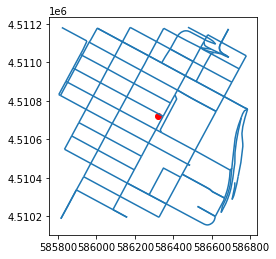

In [5]:
fig, ax = plt.subplots()
streets.plot(ax=ax)
plt.scatter(point.x,point.y,c='r')

In [6]:
polygons = shapely.ops.polygonize(streets.geometry)
polygons = gpd.GeoSeries(polygons)

In [7]:
import matplotlib.cm as cm
import matplotlib._color_data as  mcd
# get color map
cmap = cm.get_cmap('Set2', len(polygons) + 1)

In [8]:
xkcd = list(mcd.XKCD_COLORS.values())

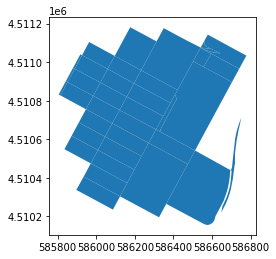

In [9]:
polygons.plot()

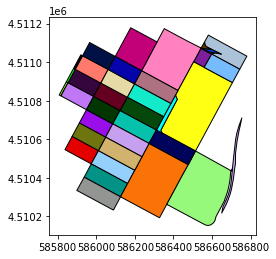

In [10]:
fig, ax = plt.subplots()
for i, polygon in enumerate(polygons):
    gpd.GeoSeries(polygon).plot(ax=ax, \
                                facecolor=xkcd[-i], \
                                edgecolor='k', \
#                                 legend=True, \
                               )